<a href="https://colab.research.google.com/github/DivyaNalluri1/FML_LAb/blob/main/UniVariarte_company.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Univariate Regression on company dataset

Importing required libraries


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
from plotly.offline import iplot
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
import math

loading the data set

In [2]:
company = pd.read_csv("/content/Company_data.csv")
print(company)

        TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]


In [4]:
company.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [5]:
company.head

<bound method NDFrame.head of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]>

In [6]:
cd = company.isnull().sum()


In [7]:
cdX = company.drop('Sales', axis=1)


TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [8]:
cd = company.corr()
cd

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


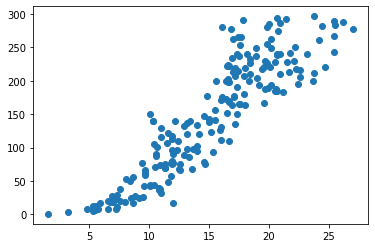

In [49]:
plt.scatter(company['Sales'],company['TV'])

Select the input and output

In [13]:
X = company.drop('Sales', axis=1).values
y = company['Sales'].values



In [36]:
x1=X[:,0]

In [37]:
x1=x1.reshape(-1,1)
y=y.reshape(-1,1)

Split the data into Training and Testing

In [39]:
x_train,x_test,y_train,y_test = train_test_split(X1,y,test_size=0.30,random_state=35,train_size=0.70) 

In [38]:
x_train.shape

(140, 1)

In [40]:
y_train.shape

(140, 1)

Train the model

In [41]:
reg = linear_model.LinearRegression()
reg.fit(x_train,y_train)
     

LinearRegression()

find the performance based on training data

In [42]:
y_train_pred = reg.predict(x_train)

In [53]:
print("MAE=",mean_absolute_error(y_train,y_train_pred))
print("MSE=",mean_squared_error(y_train,y_train_pred))
print("R2 Score=",r2_score(y_train,y_train_pred))
#MSE = np.square(np.subtract(x_train,y_train_pred)).mean()
#rmse = math.sqrt(MSE)
#print("RMSE=",rmse)
print("RMSE =", np.sqrt(mean_squared_error(y_train,y_train_pred)))


MAE= 1.8773843448532914
MSE= 5.468522315169904
R2 Score= 0.8123536934649148
RMSE = 2.3384871851626436


find the performance based on test data

In [47]:
y_test_pred = reg.predict(x_test)

In [54]:
print("MAE=",mean_absolute_error(y_test,y_test_pred))
print("MSE=",mean_squared_error(y_test,y_test_pred))
print("R2 Score=",r2_score(y_test,y_test_pred))
#MSE = np.square(np.subtract(x_test,y_test_pred)).mean()
#rmse = math.sqrt(MSE)
#print("RMSE=",rmse)
print("RMSE =", np.sqrt(mean_squared_error(y_test,y_test_pred
                                           )))


MAE= 1.7186168406799462
MSE= 4.708791927313346
R2 Score= 0.8085245282359501
RMSE= 158.2735805064772
RMSE = 2.1699750983164177


scatter plot for trian data

In [55]:
prediction_space  = np.linspace(min(x_train), max(x_train)).reshape(-1,1)


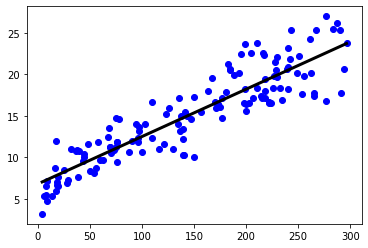

In [60]:
plt.scatter(x_train, y_train, color='blue')
plt.plot(prediction_space, reg.predict(prediction_space), color='black', linewidth=3)
plt.show()


scatter plot for test data

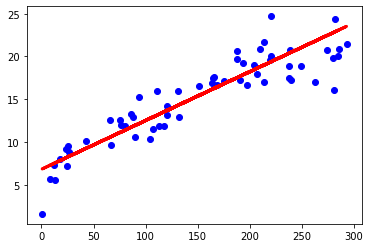

In [64]:
plt.scatter(x_test, y_test, color='blue')
plt.plot(x_test, reg.predict(x_test), color='red', linewidth=3)
plt.show()
